*Installation of required library*

In [29]:
%pip install requests beautifulsoup4

Note: you may need to restart the kernel to use updated packages.


**import the required library** 

In [30]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


**send a request to the website**

In [31]:
web_url = "https://quotes.toscrape.com/"
response = requests.get(web_url)

In [32]:
## to check the response success (note the value should fall within the range of 200 to 299)
response.status_code

200

**Get the html content**

In [33]:
html =response.text

In [34]:
## to get the length of text
len(response.text)

11021

***saving the webpage contents***

In [35]:
page_contents=response.text

with open('web.html','w') as f:
    f.write(page_contents)

parse the html with beautifulsoup

In [36]:
soup = BeautifulSoup(html,"html.parser")

In [37]:
## find all quotes
quotes = soup.find_all("span" ,class_="text")

print(len(quotes))

10


Print the extrated test

In [38]:
for quote in quotes:
    print(quote.get_text())


“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”
“It is our choices, Harry, that show what we truly are, far more than our abilities.”
“There are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle.”
“The person, be it gentleman or lady, who has not pleasure in a good novel, must be intolerably stupid.”
“Imperfection is beauty, madness is genius and it's better to be absolutely ridiculous than absolutely boring.”
“Try not to become a man of success. Rather become a man of value.”
“It is better to be hated for what you are than to be loved for what you are not.”
“I have not failed. I've just found 10,000 ways that won't work.”
“A woman is like a tea bag; you never know how strong it is until it's in hot water.”
“A day without sunshine is like, you know, night.”


**Scraping Authors Name**

In [39]:
authors = soup.find_all("small", class_="author")

for author in authors:
    print(author.text)


Albert Einstein
J.K. Rowling
Albert Einstein
Jane Austen
Marilyn Monroe
Albert Einstein
André Gide
Thomas A. Edison
Eleanor Roosevelt
Steve Martin


**Store the list**

In [40]:
quotes_list = []

for quote in quotes:
    quotes_list.append(quote.text)

print(quotes_list)


['“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”', '“It is our choices, Harry, that show what we truly are, far more than our abilities.”', '“There are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle.”', '“The person, be it gentleman or lady, who has not pleasure in a good novel, must be intolerably stupid.”', "“Imperfection is beauty, madness is genius and it's better to be absolutely ridiculous than absolutely boring.”", '“Try not to become a man of success. Rather become a man of value.”', '“It is better to be hated for what you are than to be loved for what you are not.”', "“I have not failed. I've just found 10,000 ways that won't work.”", "“A woman is like a tea bag; you never know how strong it is until it's in hot water.”", '“A day without sunshine is like, you know, night.”']


**Save the data as CSV**

In [41]:
import csv

with open("Quotes.csv", "w", newline="", encoding="utf-8") as file:
    writer = csv.writer(file)
    writer.writerow(["Quote"])

    for quote in quotes_list:
        writer.writerow([quote])


In [42]:
web_url = "https://quotes.toscrape.com"
base_url = web_url
all_data = []


**loop through pages**
- Used for loop because the number of pages are known

In [43]:
all_data = []

for page in range(1, 11):
    url = f"{base_url}/page/{page}/"
    response = requests.get(url)
    soup = BeautifulSoup(response.text, "html.parser")

    quotes = soup.find_all("div", class_="quote")

    for quote in quotes:
        text = quote.find("span", class_="text").text
        author = quote.find("small", class_="author").text
        tags = [tag.text for tag in quote.find_all("a", class_="tag")]

        all_data.append({
            "quote": text,
            "author": author,
            "tags": tags
        })



**store scrapped data in a dataframe**

In [44]:
df = pd.DataFrame(all_data)

# Quick check
print(df.head())

                                               quote           author  \
0  “The world as we have created it is a process ...  Albert Einstein   
1  “It is our choices, Harry, that show what we t...     J.K. Rowling   
2  “There are only two ways to live your life. On...  Albert Einstein   
3  “The person, be it gentleman or lady, who has ...      Jane Austen   
4  “Imperfection is beauty, madness is genius and...   Marilyn Monroe   

                                             tags  
0        [change, deep-thoughts, thinking, world]  
1                            [abilities, choices]  
2  [inspirational, life, live, miracle, miracles]  
3              [aliteracy, books, classic, humor]  
4                    [be-yourself, inspirational]  


In [45]:
print(type(df['tags'].iloc[0]))


<class 'list'>


**count Quotes per author**

In [46]:
author_counts = df['author'].value_counts()
print(author_counts)


author
Albert Einstein           10
J.K. Rowling               9
Marilyn Monroe             7
Dr. Seuss                  6
Mark Twain                 6
Jane Austen                5
C.S. Lewis                 5
Bob Marley                 3
Mother Teresa              2
Eleanor Roosevelt          2
Charles Bukowski           2
Ernest Hemingway           2
George R.R. Martin         2
Suzanne Collins            2
Ralph Waldo Emerson        2
Steve Martin               1
André Gide                 1
Thomas A. Edison           1
Allen Saunders             1
Pablo Neruda               1
Elie Wiesel                1
Friedrich Nietzsche        1
Douglas Adams              1
Charles M. Schulz          1
William Nicholson          1
Garrison Keillor           1
Jorge Luis Borges          1
Martin Luther King Jr.     1
Haruki Murakami            1
James Baldwin              1
Alexandre Dumas fils       1
Stephenie Meyer            1
George Eliot               1
Jim Henson                 1
George 

In [47]:
print(df.shape)

(100, 3)


**Top 10 tags**

In [48]:
from collections import Counter

all_tags = []

for tag_list in df['tags']:
    all_tags.extend(tag_list)  # extend with the list

tag_counts = Counter(all_tags)

# Top 10 tags
print("Top 10 tags:")
for tag, count in tag_counts.most_common(10):
    print(tag, count)


Top 10 tags:
love 14
inspirational 13
life 13
humor 12
books 11
reading 7
friendship 5
friends 4
truth 4
simile 3


*Top ten tags visuals*

C:\Users\Aniedobe Monica\AppData\Local\Temp\ipykernel_14760\50185118.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=tags, palette="viridis")


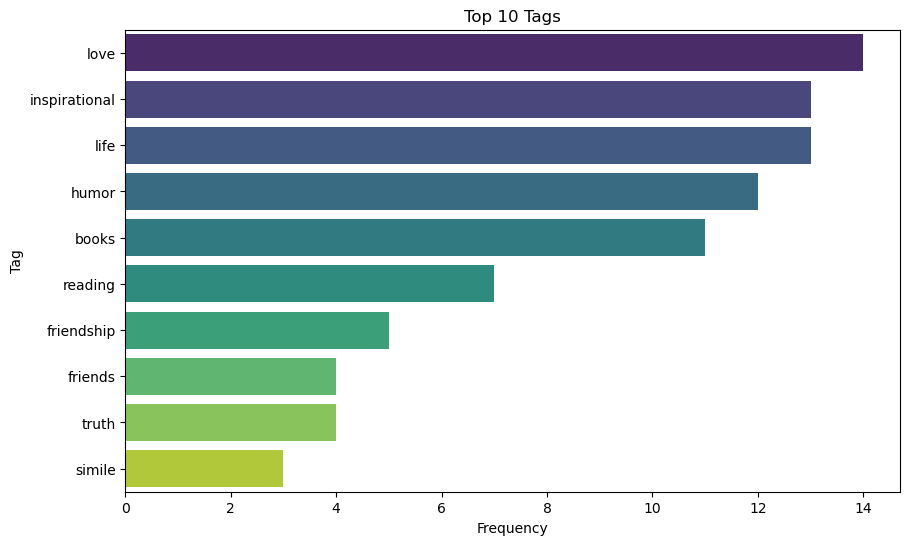

In [49]:
top_tags = tag_counts.most_common(10)
tags = [tag for tag, count in top_tags]
counts = [count for tag, count in top_tags]

plt.figure(figsize=(10,6))
sns.barplot(x=counts, y=tags, palette="viridis")
plt.title("Top 10 Tags")
plt.xlabel("Frequency")
plt.ylabel("Tag")
plt.show()


**Average Number of tags per quote**

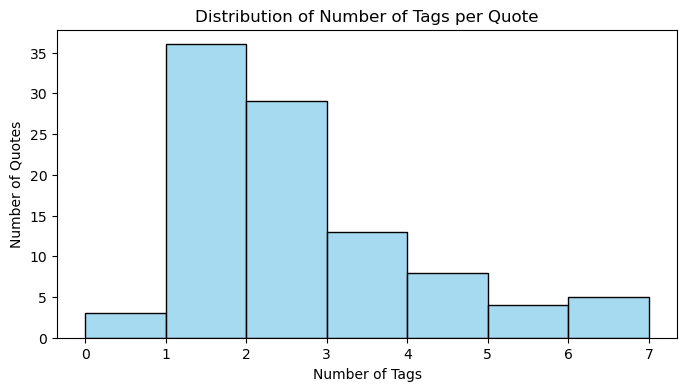

In [50]:
df['num_tags'] = df['tags'].apply(len)
plt.figure(figsize=(8,4))
sns.histplot(df['num_tags'], bins=range(0,8), color="skyblue")
plt.title("Distribution of Number of Tags per Quote")
plt.xlabel("Number of Tags")
plt.ylabel("Number of Quotes")
plt.show()



**TOP 10 AUTHORS** 

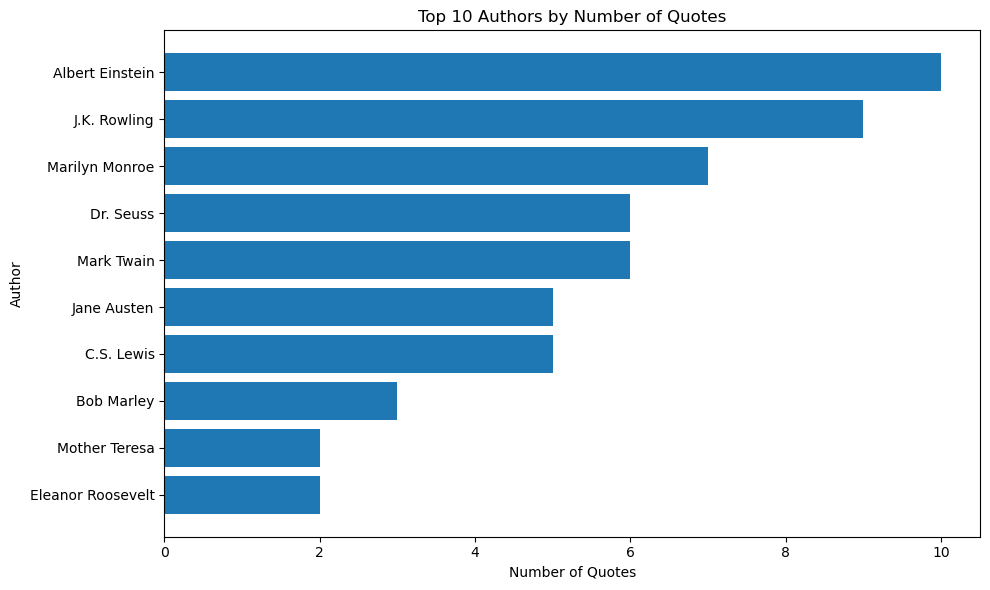

In [51]:
import matplotlib.pyplot as plt

top_authors = df['author'].value_counts().head(10)

plt.figure(figsize=(10,6))
plt.barh(top_authors.index, top_authors.values)

plt.xlabel("Number of Quotes")
plt.ylabel("Author")
plt.title("Top 10 Authors by Number of Quotes")

plt.gca().invert_yaxis()  # Highest at top
plt.tight_layout()
plt.show()


**Share of top 5 Authors**


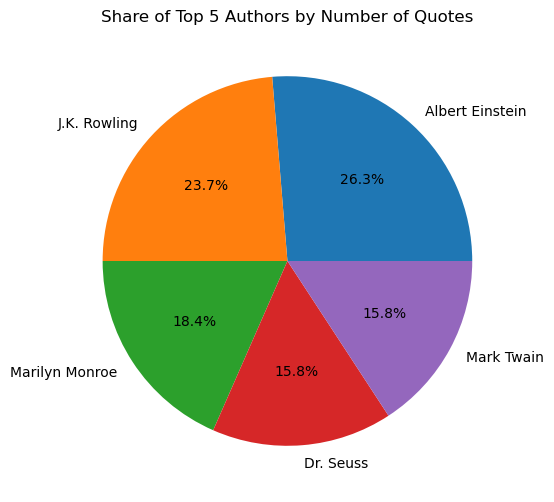

In [52]:
top_authors = df['author'].value_counts().head(5)

plt.figure(figsize=(6,6))
plt.pie(
    top_authors.values,
    labels=top_authors.index,
    autopct='%1.1f%%'
)

plt.title("Share of Top 5 Authors by Number of Quotes")
plt.show()


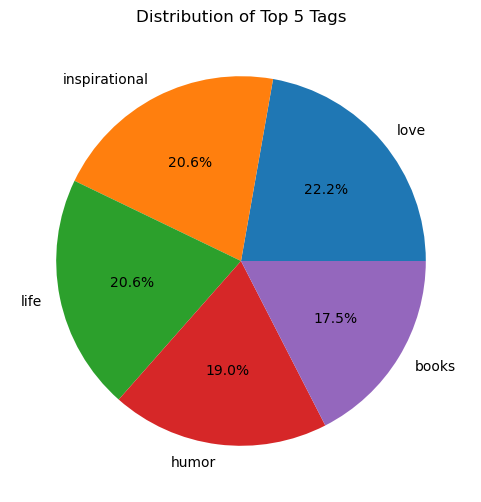

In [53]:
top_tags = (
    df.explode('tags')['tags']
    .value_counts()
    .head(5)
)

plt.figure(figsize=(6,6))
plt.pie(
    top_tags.values,
    labels=top_tags.index,
    autopct='%1.1f%%'
)

plt.title("Distribution of Top 5 Tags")
plt.show()
